# Программирование Python

## "Обработка многомерных массивов в библиотеке NumPy с использованием IPython"

Выполнил студент Мурсалимов Акмаль Тимурович группы ИС/м-20-1-о.

In [1]:
import numpy as np
import random
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc
import imageio
import math
%matplotlib inline

##### <font color='red'>Задание</font>

Создать класс, реализующий функционал учета рейтинга студентов **StudentsRaiting**. Класс должен иметь конструктор, который будет принимать список студентов с результатами сданных экзаменов, реализованый в виде словаря с ключем "ФИО студента" и оценками по экзаменам по 4 предметам (Программирование, Дискретная математика, Иностранный язык, Философия), представленными в виде упорядоченного множества (кортежа). Например:

`{"Иванов Петр Николавич":(3,3,5,4), "Петров Иван Константинович":(5,4,5,4)}`

Релизовать методы: 
- добавления студента с оценками по экзаменам
- удаления студента из рейтинга 
- получения списка студентов с рейтингом выше порогового
- метод демонстрации работы методов класса с выводом результатов на печать в виде текстовой таблицы.

Примечание:
Рейтинг составляется по суммарному баллу по всем предметам.

In [2]:
class StudentsRaiting:    

    # Constructor
    def __init__(self, students):
        self.students = students  
 

    def printStudents(self, data = None):
        if data == None: 
            data = self.students
        df = pd.DataFrame({'Student' : list(data.keys()),
                       'Marks' : list(data.values())})
        print(tabulate(df, headers='keys', tablefmt='psql'))
   
    def show(self):
        print(self.students)
        
    def addStud(self,student):
        if type(student) is dict:
            self.students.update(student)
        
    def delStud(self,student):
        self.students.pop(student,None)
        
    def getStudsWithRating(self,rating):
        if type(rating) is not int: 
            return None
        result = {}
        for a,b in self.students.items():
            if sum(b)>=rating:
                result.update({a:b})
        self.printStudents(result)
        
       

print("Initializing new journal:")

journal = StudentsRaiting({"Иванов Петр Николавич":(3,3,5,4),
                     "Петров Иван Константинович":(5,4,5,4),
                     "Иванов Иван Константинович":(4,5,3,5),
                     "Петров Петр Николавич":(4,4,3,4)})  

journal.printStudents() 



print("\n\n\n")

print("Adding new students:")

journal.addStud({"Аааа ААА Аааааа":(5,5,5,5),
                 "BBB bbb BBBBbbbb":(2,3,2,2)})

journal.printStudents() 



print("\n\n\n")

print("Removing student by name:")

journal.delStud("Аааа ААА Аааааа")

journal.printStudents() 


print("\n\n\n")

print("Getting students with good rating (more than 15):")

journal.getStudsWithRating(15)








Initializing new journal:
+----+----------------------------+--------------+
|    | Student                    | Marks        |
|----+----------------------------+--------------|
|  0 | Иванов Петр Николавич      | (3, 3, 5, 4) |
|  1 | Петров Иван Константинович | (5, 4, 5, 4) |
|  2 | Иванов Иван Константинович | (4, 5, 3, 5) |
|  3 | Петров Петр Николавич      | (4, 4, 3, 4) |
+----+----------------------------+--------------+




Adding new students:
+----+----------------------------+--------------+
|    | Student                    | Marks        |
|----+----------------------------+--------------|
|  0 | Иванов Петр Николавич      | (3, 3, 5, 4) |
|  1 | Петров Иван Константинович | (5, 4, 5, 4) |
|  2 | Иванов Иван Константинович | (4, 5, 3, 5) |
|  3 | Петров Петр Николавич      | (4, 4, 3, 4) |
|  4 | Аааа ААА Аааааа            | (5, 5, 5, 5) |
|  5 | BBB bbb BBBBbbbb           | (2, 3, 2, 2) |
+----+----------------------------+--------------+




Removing student by name:
+

##### <font color=red>Задание</font>
Создать массив значений типа `int32` размером 10х10, состоящий из равномерно распределенных случайных чисел от 0 до 100. Получить 4 копии этого массива со значениями типа `uint32`,`int64`,`uint64`,`float`. Для каждого массива вывести сведения: число размерностей, форма, размер, тип данных, размер каждого значения в байтах и размер всего массива в байтах.


In [3]:
massives = ([np.random.randint(100, size=(10, 10))])

massives.extend([np.array(massives[0], dtype=np.uint32),
             np.array(massives[0], dtype=np.int64),
             np.array(massives[0], dtype=np.uint64),
             np.array(massives[0], dtype=np.float)])

df = pd.DataFrame({'Name' : ["Main","Copy №1","Copy №2","Copy №3","Copy №4",],
                   'Type' : list(map(lambda s: s.dtype, massives)),
                   'Dimensions' : list(map(lambda s: s.ndim, massives)),
                   'Shape' : list(map(lambda s: s.shape, massives)),
                   'Size' : list(map(lambda s: s.size, massives)),
                   'ItemWeight(Bytes)' : list(map(lambda s: s.itemsize, massives)),
                   'Weight(Bytes)' : list(map(lambda s: s.nbytes, massives))})
print(tabulate(df, headers='keys', tablefmt='psql'))

+----+---------+---------+--------------+----------+--------+---------------------+-----------------+
|    | Name    | Type    |   Dimensions | Shape    |   Size |   ItemWeight(Bytes) |   Weight(Bytes) |
|----+---------+---------+--------------+----------+--------+---------------------+-----------------|
|  0 | Main    | int32   |            2 | (10, 10) |    100 |                   4 |             400 |
|  1 | Copy №1 | uint32  |            2 | (10, 10) |    100 |                   4 |             400 |
|  2 | Copy №2 | int64   |            2 | (10, 10) |    100 |                   8 |             800 |
|  3 | Copy №3 | uint64  |            2 | (10, 10) |    100 |                   8 |             800 |
|  4 | Copy №4 | float64 |            2 | (10, 10) |    100 |                   8 |             800 |
+----+---------+---------+--------------+----------+--------+---------------------+-----------------+


##### <font color=red>Задание</font>
Выполнить следующий код и объяснить результат.

In [4]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print("A mass:", a)
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print("col_r1, col_r1.shape: \n", col_r1, col_r1.shape)
print()
print("col_r2, col_r2.shape: \n",col_r2, col_r2.shape)

A mass: [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
col_r1, col_r1.shape: 
 [ 2  6 10] (3,)

col_r2, col_r2.shape: 
 [[ 2]
 [ 6]
 [10]] (3, 1)


##### <font color=green>Ответ</font>
col_r1 = a[:, 1] - берем второй элемент из всех строк исходного массива. ":" - выбрать все элементы данного измерения массива

col_r2 = a[:, 1:2] - берем С первого ПО второй элемент из всех строк исходного массива.

Функция Shape позволяет узнать форму массива.

##### <font color=red>Задание</font>
Создать массив случайных целочисленных значений (от -100 до 100) размером 8x8. Используя индексацию булевыми массивами получить:
1. Все элементы, значения которых являются четными числами. Вывести их маску в массиве.
2. Все элементы, значения которых попадают в диапазон от 10 до 50. Вывести их маску в массиве.
3. Все элементы, значения которых являются четными числами и попадают в диапазон от 10 до 50. Вывести их маску в массиве.
4. Все элементы, значения которых являются нечетными числами и модуль значения которых из диапазона от 10 до 50. Вывести их маску в массиве.
5. Все элементы, значения которых являются нечетными числами или отрицательными.

In [5]:


main_mass = np.random.randint(-100, 100, size=(8, 8))
print('main_mass\n',main_mass)

print("\n\n\nTask №1:\nВсе элементы, значения которых являются четными числами:\n",
      main_mass[main_mass%2==0])
print("\n\nМаска:\n",(main_mass%2==0))


print("\n\n\nTask №2:\nВсе элементы, значения которых попадают в диапазон от 10 до 50:\n",
      main_mass[(main_mass >=10 )&(main_mass <=50 )])
print("\n\nМаска:\n",((main_mass >=10 )&(main_mass <=50 )))

print("\n\n\nTask №3:\nВсе элементы, значения которых являются четными числами и попадают в диапазон от 10 до 50:\n",
      main_mass[(main_mass%2==0)&(main_mass >=10 )&(main_mass <=50 )])
print("\n\nМаска:\n",((main_mass%2==0)&(main_mass >=10 )&(main_mass <=50 )))

print("\n\n\nTask №4:\nВсе элементы, значения которых являются нечетными числами",
      " и модуль значения которых из диапазона от 10 до 50:\n",
      main_mass[(main_mass%2!=0)&(abs(main_mass) >=10 )&(abs(main_mass) <=50 )])
print("\n\nМаска:\n",((main_mass%2!=0)&(abs(main_mass) >=10 )&(abs(main_mass) <=50 )))


print("\n\n\nTask №5:\nВсе элементы, значения которых являются нечетными числами или отрицательными:\n",
      main_mass[(main_mass%2!=0)|(main_mass <0 )])
print("\n\nМаска:\n",((main_mass%2!=0)|(main_mass <0 )))

main_mass
 [[  26   22  -75  -65   60   92   43  -51]
 [  65  -50  -46   33   26   30  -15  -56]
 [ -37 -100  -67   15   97  -34   15  -41]
 [   7  -27  -85  -70   14   82  -54  -79]
 [ -23   49   85  -16  -72  -31    3  -78]
 [ -90   36  -79   33   49  -28   81  -85]
 [  31   -3   -2  -51   52  -33  -53    5]
 [ -85    0  -84   46  -38  -61  -80   17]]



Task №1:
Все элементы, значения которых являются четными числами:
 [  26   22   60   92  -50  -46   26   30  -56 -100  -34  -70   14   82
  -54  -16  -72  -78  -90   36  -28   -2   52    0  -84   46  -38  -80]


Маска:
 [[ True  True False False  True  True False False]
 [False  True  True False  True  True False  True]
 [False  True False False False  True False False]
 [False False False  True  True  True  True False]
 [False False False  True  True False False  True]
 [ True  True False False False  True False False]
 [False False  True False  True False False False]
 [False  True  True  True  True False  True False]]



Task №2:


##### <font color=red>Задание</font>
Написать функцию, которая из исходного массива размером 8х8 получает (при помощи операций разбиения и объединения) массив, в котором переставлены квадранты 1-й с 3-м, 2-й с 4-м по сравнению с исходным массивом. Продемонстрировать работу функции все шаги алгоритма сопроводить подробными комментариями и отладочным выводом промежуточных результатов.

Т.е. например из массива

`[[49  5 49  1 28 27 31 35]
 [21 12 34  3 20  2 42 48]
 [21 22 39 23 28 31 47 34]
 [37  6 24 22 19 32 27 20]
 [12  0  1 40  2 30 42 47]
 [33 40 10  8 29 48 24  8]
 [14 49  8 46 23 18 10 49]
 [15 20 49 30  9 18 42  5]]`
 
должен получиться массив 

 `[[ 2 30 42 47 12  0  1 40]
 [29 48 24  8 33 40 10  8]
 [23 18 10 49 14 49  8 46]
 [ 9 18 42  5 15 20 49 30]
 [28 27 31 35 49  5 49  1]
 [20  2 42 48 21 12 34  3]
 [28 31 47 34 21 22 39 23]
 [19 32 27 20 37  6 24 22]]`

In [6]:
def replace_squares(mass,mid=False):
    if list(mass.shape)[0]%2!=0 or list(mass.shape)[1]%2!=0:
        return None    
    sh = [list(mass.shape)[0]//2,list(mass.shape)[1]//2]    
    res = mass.copy()
    squares = (mass[:sh[0],:sh[1]],
              mass[sh[0]:,:sh[1]],
              mass[:sh[0],sh[1]:],
              mass[sh[0]:,sh[1]:])
    if mid:
        middle_results = list(squares)
        print("\n\nMiddle results:\n\nFirst square: \n",middle_results[0],
              "\nSecond square: \n",middle_results[1],
              "\nThird square: \n",middle_results[2],
              "\nFourth square: \n",middle_results[3])
    res[sh[0]:,sh[1]:],res[:sh[0],sh[1]:],res[sh[0]:,:sh[1]],res[:sh[0],:sh[1]]=squares
    return res
    
    
#massive = np.random.randint(-5, 5, size=(8,8))
massive = np.array([[49,  5, 49,  1, 28, 27, 31, 35],
                    [21, 12, 34,  3, 20,  2, 42, 48],
                    [21, 22, 39, 23, 28, 31, 47, 34],
                    [37,  6, 24, 22, 19, 32, 27, 20],
                    [12,  0,  1, 40,  2, 30, 42, 47],
                    [33, 40, 10,  8, 29, 48, 24,  8],
                    [14, 49,  8, 46, 23, 18, 10, 49],
                    [15, 20, 49, 30,  9, 18, 42,  5]])
print("Input massive:\n", massive)
#if middle results are in need, add True
#massive = replace_squares(massive,True)
massive = replace_squares(massive)
print("\n\n\nRESULT:\n",massive)

Input massive:
 [[49  5 49  1 28 27 31 35]
 [21 12 34  3 20  2 42 48]
 [21 22 39 23 28 31 47 34]
 [37  6 24 22 19 32 27 20]
 [12  0  1 40  2 30 42 47]
 [33 40 10  8 29 48 24  8]
 [14 49  8 46 23 18 10 49]
 [15 20 49 30  9 18 42  5]]



RESULT:
 [[ 2 30 42 47 12  0  1 40]
 [29 48 24  8 33 40 10  8]
 [23 18 10 49 14 49  8 46]
 [ 9 18 42  5 15 20 49 30]
 [28 27 31 35 49  5 49  1]
 [20  2 42 48 21 12 34  3]
 [28 31 47 34 21 22 39 23]
 [19 32 27 20 37  6 24 22]]


In [7]:
def translation_check(A,B):
    try:
        RESULT=A+B
    except:
        print(A.shape," + ",B.shape," Выбрасывает исключение")
    else:
        print(A.shape," + ",B.shape," = RESULT.shape",RESULT.shape)
        
print("Проверка практичным методом: ")
translation_check(np.ones((100,100,4)), np.ones(3))
translation_check(np.ones((15,1,6,5)), np.ones((7,1,5)))
translation_check(np.ones((12,3,8)), np.ones((3,1)))
translation_check(np.ones((10,4,1,6)), np.ones((3,1,6)))
translation_check(np.ones((10,1)), np.ones((1,10,3)))
print("Результаты, которые не выбросили исключение, при не совпадении размерности дополнялись единицами слева.\n",
      "Затем все единицы приводились к соответствующей размерности в суммируемых массивах.\n",
      "Исключения были выброшены в тех случаях, когда размерности измерений не совпадали и не являлись единицами.")

Проверка практичным методом: 
(100, 100, 4)  +  (3,)  Выбрасывает исключение
(15, 1, 6, 5)  +  (7, 1, 5)  = RESULT.shape (15, 7, 6, 5)
(12, 3, 8)  +  (3, 1)  = RESULT.shape (12, 3, 8)
(10, 4, 1, 6)  +  (3, 1, 6)  Выбрасывает исключение
(10, 1)  +  (1, 10, 3)  = RESULT.shape (1, 10, 3)
Результаты, которые не выбросили исключение, при не совпадении размерности дополнялись единицами слева.
 Затем все единицы приводились к соответствующей размерности в суммируемых массивах.
 Исключения были выброшены в тех случаях, когда размерности измерений не совпадали и не являлись единицами.


##### <font color=red>Задание</font>
Создать класс наследник от класса учета рейтинга студентов (**StudentsRaiting**) и расширить его методами рассчета статистики по предметам (средний балл, максимальный балл, минимальный балл). Для этого нужно преобразовать данные об оценках из словаря в массив и использовать функции библиотеки Numpy.
(Программирование, Дискретная математика, Иностранный язык, Философия)

Примечание: Использовать универсальные функции для работы с массивами numpy.

In [8]:
class StudentsRaitingExtanded(StudentsRaiting):
    
    def __init__(self, students):
        StudentsRaiting.__init__(self,students)
        
    def showStatistics(self):
        subjNames=["Программирование", "Дискретная математика", "Иностранный язык", "Философия"]
        marks = ["Минимальный балл: ","Средний балл: ","Максимальный балл: "]
        source = np.array(list(self.students.values()),dtype=np.float)
        statistics = np.array([np.amin(source,0),np.round(np.average(source,0)),np.amax(source,0)])
        print("Статистика по предметам:")        
        for i in range(4):
            print(tabulate({subjNames[i] : marks,
                       'Балл' : statistics[0:3,i],
                       'Количество' :  list(map(lambda s: list(source[:,i]).count(s), statistics[0:3,i]))}, 
                       headers='keys', tablefmt='psql'))
        
journalExtanded = StudentsRaitingExtanded({"Иванов Петр Николавич":(3,3,5,4),
                                           "Петров Иван Константинович":(5,4,5,4),
                                           "Иванов Иван Константинович":(4,5,3,5),
                                           "Петров Петр Николавич":(4,4,3,4)})  
journalExtanded.printStudents()
print('\n\n')
journalExtanded.showStatistics()

+----+----------------------------+--------------+
|    | Student                    | Marks        |
|----+----------------------------+--------------|
|  0 | Иванов Петр Николавич      | (3, 3, 5, 4) |
|  1 | Петров Иван Константинович | (5, 4, 5, 4) |
|  2 | Иванов Иван Константинович | (4, 5, 3, 5) |
|  3 | Петров Петр Николавич      | (4, 4, 3, 4) |
+----+----------------------------+--------------+



Статистика по предметам:
+--------------------+--------+--------------+
| Программирование   |   Балл |   Количество |
|--------------------+--------+--------------|
| Минимальный балл:  |      3 |            1 |
| Средний балл:      |      4 |            2 |
| Максимальный балл: |      5 |            1 |
+--------------------+--------+--------------+
+-------------------------+--------+--------------+
| Дискретная математика   |   Балл |   Количество |
|-------------------------+--------+--------------|
| Минимальный балл:       |      3 |            1 |
| Средний балл:           |

##### <font color=red>Задание</font>
0. Создать функцию `Function1(x)`, возвращающую вектор `y`, размер которого равен размеру вектора `x` и выполняющую поэлементное вычисление по формуле `y=1/(1+exp(-x)`. Создать функцию `Function2(x)`, возвращающую вектор `y`, размер которого равен размеру вектора `x` и выполняющую поэлементное вычисление по формуле `y=max(0,x)`.
1. Написать функцию `LinearTransform(M,x,b)`, где `M` - матрица, `x` - вектор, `b` - число. Функция должна ввозвращать вектор `y`, размер которого равен размеру вектора `x`, где `y` рассчитывается по формуле `y=M*x+b`, здесь под операцией `*` понимается операция скалярного произведения (dot product) матрицы на вектор.
2. Написать функцию `Transform(M1,M2,x,b1,b2)`, где `M1`,`M2` - матрицы, `x` - вектор, `b1`,`b2` - числа. Функция должна ввозвращать вектор `y`, размер которого равен размеру вектора `x`, где `y` рассчитывается по формуле `y=Function2(LinearTransform(M2,x2,b2))`, а `x2=Function1(LinearTransform(M1,x,b1))`.
3. Задать матрицы M1,M2 размером MxN, вектор размером N, и числа b1,b2 и выполнить вычисления `Transform(M1,M2,x,b1,b2)`, производя замеры времени выполнения функции. **Значения M и N нужно узнать у преподавателя.** 

Все функции задания нужно реализовать в двух вариантах: 
* с использованием универсальных векторизованных операций;
* с использованием циклов для вычислений.

Сравнить время выполнения для обеих реализаций и сделать выводы.

In [9]:
def Function1_cycle(x):
    if not (type(x) is np.ndarray):
        return None
    y=np.zeros(x.shape)
    for i in range(x.shape[0]):
        y[i]= 1/(1+math.exp(-x[i]))
    return y
    
def Function2_cycle(x):
    if not (type(x) is np.ndarray):
        return None
    y=np.zeros(x.shape)
    for i in range(x.shape[0]):
        y[i]=max(0,x[i])
    return y
    
def LinearTransform_cycle(M,x,b):
    if not (type(M) is np.ndarray and type(x) is np.ndarray and type(b) is int):
        if M.shape[1] != x.shape[0]:
            return None
        return None
    
    
    
    y,temp = ([],0)
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            temp+= M[i,j] * x[j]
        y.append(temp+b)
        temp=0
    return np.array(y)

def Function1_numpy(x):
    if not (type(x) is np.ndarray):
        return None
    return np.divide(1,np.add(1,np.exp(np.negative(x))))
    
def Function2_numpy(x):
    if not (type(x) is np.ndarray):
        return None       
    return np.maximum(0,x)

def LinearTransform_numpy(M,x,b):
    if not (type(M) is np.ndarray and type(x) is np.ndarray and type(b) is int):
        if M.shape[1] != x.shape[0]:
            return None
        return None
    return np.dot(M,x)+b

def Transform(M1,M2,x,b1,b2,func):
    if func!='cycle' and func!='numpy' and (not (type(M1) is np.ndarray 
                                               and type(M2) is np.ndarray 
                                               and type(x) is np.ndarray 
                                               and type(b1) is int 
                                               and type(b2) is int)):
        if M1.shape[1] != x.shape[0]:
            return None
        return None
    if func=='cycle':
        x2=Function1_cycle(LinearTransform_cycle(M1,x,b1))
        y=Function2_cycle(LinearTransform_cycle(M2,x2,b2))
    else:
        x2=Function1_numpy(LinearTransform_numpy(M1,x,b1))
        y=Function2_numpy(LinearTransform_numpy(M2,x2,b2))
    return y



axis_X = random.randint(2,10)
axis_Y = random.randint(2,10)
M_1 = np.random.randint(-10,10, size=(axis_X, axis_Y))   
M_2 = np.random.randint(-10,10, size=(axis_X, axis_X))     
x = np.random.randint(-10,10, size=(axis_Y,1))
b_1 = random.randint(2,10)
b_2 = random.randint(2,10)


print("matrix 1:\n",M_1)
print("matrix 2:\n",M_2)
print("vector:\n",*x)
print("number:\n",b_1,"\n")

%time Transform(M_1,M_2,x,b_1,b_2,'numpy')
%time Transform(M_1,M_2,x,b_1,b_2,'cycle')

matrix 1:
 [[ -3  -2   0  -2  -2  -5]
 [  5  -7   5   5   8  -8]
 [  1   6  -9  -3  -5  -5]
 [  1   1   0 -10   3  -9]
 [  6   5   5 -10 -10  -5]
 [  8  -7  -4   5  -4  -1]
 [ -3   9   9  -5   9   2]
 [ -5   4   6   8  -7  -9]]
matrix 2:
 [[ -2  -4  -5  -3   1   4  -8   2]
 [ -1   6  -6   1  -3   5   1 -10]
 [  8   5  -2   9   5   9  -3   4]
 [  8   7  -8  -9  -4  -7   5 -10]
 [  0  -1  -3  -9   4   4   9  -8]
 [  6   6   3  -2   4  -5   1   6]
 [ -5   6   0   9   1   6  -2   0]
 [  7   0   8   4   3  -4  -8   5]]
vector:
 [-4] [-4] [3] [-9] [-7] [-2]
number:
 3 

Wall time: 0 ns
Wall time: 15.6 ms


array([[ 0.        ],
       [ 0.        ],
       [28.99999966],
       [ 0.        ],
       [ 0.        ],
       [22.00000009],
       [ 9.99999977],
       [31.99999907]])

#### <font color=red>Задание</font>
Построить графики функций: $y=\sin(x)$,$y=\cos(x)$, $y=tg(x)$, $y=ctg(x)$. 
Требования к графикам:
- все графики в одной системе координат
- значения по оси x должны меняться от $-\pi$ до $\pi$.
- подписи по осям координат 
- название графика
- координатная сетка
- легенда.

(-1.0, 1.0)

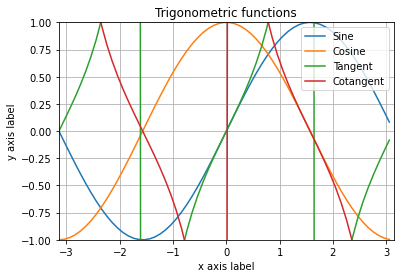

In [10]:
x = np.arange(-np.pi,np.pi, 0.1)

# Plot the points using matplotlib
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.plot(x, np.tan(x))
plt.plot(x, np.divide(1, np.tan(x)))
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Trigonometric functions')
plt.legend(['Sine', 'Cosine','Tangent','Cotangent'])
plt.grid()
plt.xlim(-np.pi,np.pi)
plt.ylim(-1,1)

#### <font color=red>Задание</font>
Построить графики функций: $y=2\cdot x^2$, $y=-2\cdot x^2$, $x=2\cdot y^2$, $x=-2\cdot y^2$
Требования к графикам:
- каждый график построить в своей системе координат, разделив лист на 4 равные части 2х2.
- значения по осям x и y должны меняться от -5 до 5.
- подписи по осям координат 
- названия графиков
- координатная сетка.

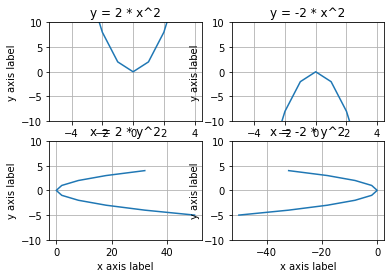

In [11]:
x = np.arange(-5, 5, 1)

plt.subplot(2, 2, 1)
plt.plot(x, np.multiply(2,np.power(x,2)))
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('y = 2 * x^2')
plt.ylim(-10,10)
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, np.multiply(-2,np.power(x,2)))
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('y = -2 * x^2')
plt.ylim(-10,10)
plt.grid()

y = np.arange(-5, 5, 1)

plt.subplot(2, 2, 3)
plt.plot(np.multiply(2,np.power(y,2)), y)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('x = 2 * y^2')
plt.ylim(-10,10)
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(np.multiply(-2,np.power(y,2)), y)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('x = -2 * y^2')
plt.ylim(-10,10)
plt.grid()

plt.show()

#### <font color=red>Задание</font>
Сгенерировать 1000 случайных значений выбранного распределения (вид уточнить у преподавателя) и построить гистограмму частот и гистограмму относительных частот. 
Требования к графикам:
- графики расположить горизонтально
- подписи по осям координат 
- названия графиков.

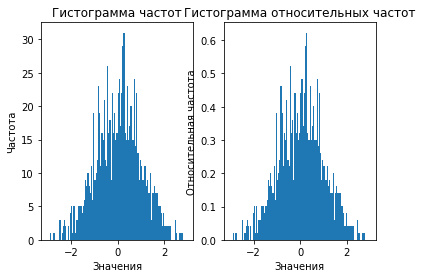

In [12]:
normRand = np.random.randn(1000)
histBins = np.arange(-3, 3, 0.05)

plt.subplot(1, 2, 1)
plt.hist(normRand, histBins)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма частот')

plt.subplot(1, 2, 2)
plt.hist(normRand, histBins,density=True)
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.title('Гистограмма относительных частот')

plt.show()

#### <font color=red>Задание</font>
Повторить крайний пример, изменив вид распределений, используемый для генерации массивов x и y (вид распределений уточнить у преподавателя).

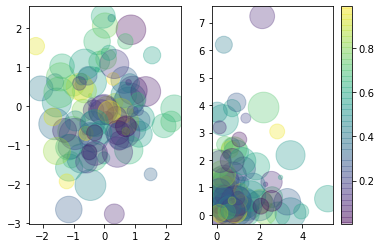

In [13]:
rng = np.random.RandomState(0)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.subplot(1, 2, 1)
x = rng.randn(100)
y = rng.randn(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)

plt.subplot(1, 2, 2)
x = rng.exponential(size=100)
y = rng.exponential(size=100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar();  # Отображаем цветовую шкалу

#### <font color=red>Задание</font>
1. Выбрать произвольное цветное изображение и загрузить в среду IPython.
2. Построить гистограммы яркостей для всех трех каналов.
3. Используя матричные операции обнулить яркости синего и зеленого каналов в изображении и отобразить его. 
4. Используя матричные операции обнулить яркости красного канала в изображении и отобразить его.

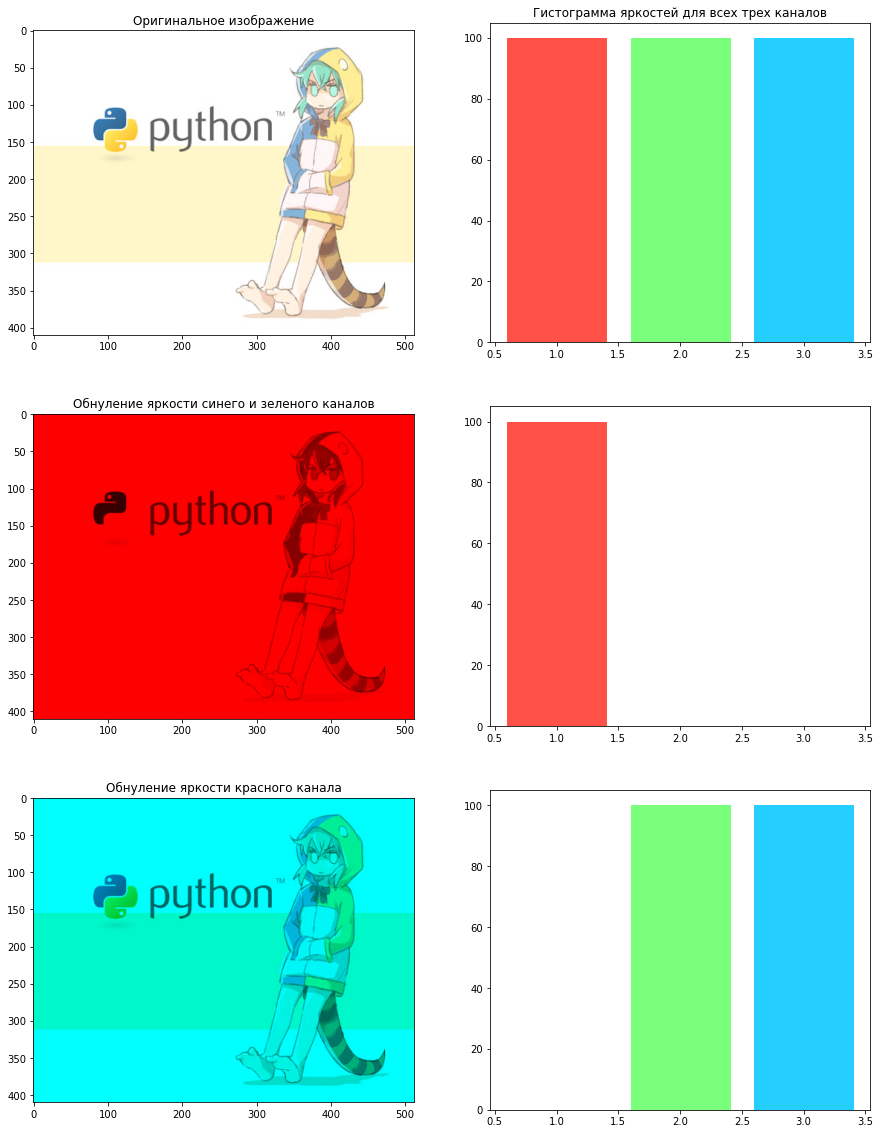

In [14]:
img = imageio.imread('test.jpg')
plt.figure(figsize=(15,20))

plt.subplot(3, 2, 1)
plt.title('Оригинальное изображение')
plt.imshow( img )

plt.subplot(3, 2, 2)
barlist=plt.bar([1,2,3], [100,100,100])
plt.title('Гистограмма яркостей для всех трех каналов')
barlist[0].set_color('#ff5145')
barlist[1].set_color('#7aff7d')
barlist[2].set_color('#24cfff')

plt.subplot(3, 2, 3)
plt.title('Обнуление яркости синего и зеленого каналов')
plt.imshow( img * [1, 0, 0])

plt.subplot(3, 2, 4)
barlist=plt.bar([1,2,3], [100,0,0])
barlist[0].set_color('#ff5145')
barlist[1].set_color('#7aff7d')
barlist[2].set_color('#24cfff')

plt.subplot(3, 2, 5)
plt.title('Обнуление яркости красного канала')
plt.imshow( img * [0, 1, 1])

plt.subplot(3, 2, 6)
barlist=plt.bar([1,2,3], [0,100,100])
barlist[0].set_color('#ff5145')
barlist[1].set_color('#7aff7d')
barlist[2].set_color('#24cfff')



plt.show()